# Loading packages and functions

In [1]:
include("./src/functions.jl")

## Please input initial values of $S, I$, recovery rate $\gamma(x)$ and $dx, n$  here

In [2]:
# 
function γ(x)
    y = 1.0
    return y
end
function initS(x)
    y = 0.9 + 0.1 * sin(2 * pi * x)
    return y
end
function initI(x)
    y = 0.1 + 0.1 * cos(2 * pi * x)
    return y
end
dx = 0.05
n = 20

20

## Update $ratio(x)$ and gennerate new ODEProblem
## Important Notes

###  dS, dI, $\tau$ are expotential scale

### $\epsilon$ and $brn$ (reproduction numbers) are linear, true value

### Five kind of free parameters: $dS, dI, \tau = dI/dS, brn, \epsilon$

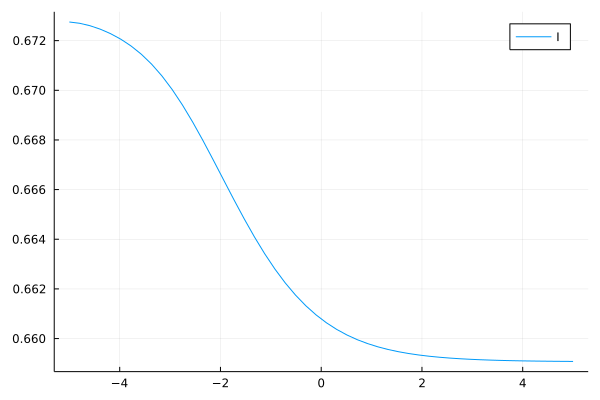

In [3]:
function ratio(x, brn, ϵ)
    y = brn + ϵ * sin(2 * pi * x)
    return y
end
prob = probgeneration!(ratio, γ, initS, initI, dx)
brn = 3.0
ϵ = 2.0
p = [1.0, 1.0, brn, ϵ]

@time episize!(prob, p, n);
Ilim = Dict("min" => -5.0, "max" => 5.0, "len" => 50)
vartype = "I"
@time epiresultI = episingle!(prob, vartype, Ilim, p, n);
plotdI(Ilim, epiresultI, vartype)

# Level Set of (dS,dI)

In [4]:
Ilim = Dict("min" => -10.0, "max" => 10.0, "len" => 50)
Slim = Dict("min" => -10.0, "max" => 10.0, "len" => 50)
leveltype = "SI"
@time epiresultSI = levelset(prob, leveltype, Slim, Ilim, p, n);
@save "./output/case1/levelsi1.bson" epiresultSI
I_range = range(Ilim["min"], Ilim["max"], length=Ilim["len"])
S_range = range(Slim["min"], Slim["max"], length=Slim["len"])
nlevels = 20
contour(I_range, S_range, epiresultSI, levels=nlevels, contour_labels=true)
xlabel!(L"\ln(d_{I})")
ylabel!(L"\ln(d_{S})")
title!(L"Level set of $(d_{S},d_{I})$")
savefig("./output/case1/levelsi1.png")

  0.855576 seconds (1.22 M allocations: 263.604 MiB, 17.39% compilation time)


# Level Set of (dI,$\tau$)

In [7]:
Ilim = Dict("min" => -10.0, "max" => 10.0, "len" => 50)
Slim = Dict("min" => -10.0, "max" => 10.0, "len" => 50)
leveltype = "IT"
@time epiresultSI = levelset(prob, leveltype, Slim, Ilim, p, n);
@save "./output/case1/levelit.bson" epiresultSI
I_range = range(Ilim["min"], Ilim["max"], length=Ilim["len"])
S_range = range(Slim["min"], Slim["max"], length=Slim["len"])
nlevels = 20
p = contour(I_range, S_range, epiresultSI, levels=nlevels, contour_labels=true)
xlabel!(L"\ln(\tau)")
ylabel!(L"\ln(d_{I})")
title!(L"Level set of $(d_{I},\tau)$")
savefig("./output/case1/levelit.png")

LoadError: MethodError: no method matching iterate(::Plots.Plot{Plots.GRBackend})
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at F:\Code\Julia\Julia-1.7.2\share\julia\base\range.jl:826
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at F:\Code\Julia\Julia-1.7.2\share\julia\base\range.jl:826
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at F:\Code\Julia\Julia-1.7.2\share\julia\base\dict.jl:695
[0m  ...